In [2]:
import requests
import json
import re
#import pycountry
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from pathlib import Path

## Apple

In [3]:
appledf = pd.read_csv("../websitedata/appletopsongsinternational2023.csv")
#print(appledf.shape)
print(type(appledf))

appledf.dropna

appledf = pd.melt(appledf, id_vars=["Pos", "P+", "Artist and Title", "Days", "Pk", "(x?)", "Pts", "Pts+", "TPts"], 
                   var_name="country", value_name="country_rank").dropna()

#print(appledf.isnull().sum())
#print(appledf.isna().sum())

appledf = appledf.drop(columns=["P+", "Pts+", "TPts"])
appledf = appledf.rename(columns={"Pos": "Chart Position","Days": "Duration (Days)", "Pk": "Peak", 
                                  "Pts": "Points", "country": "Country", "country_rank": "Country Rank"})

#print(appledf["(x?)"].value_counts())

appledf["(x?)"] = appledf["(x?)"].str.replace(r'[()]|x', "", regex = True)
#appledf = appledf[appledf["Country"].str.contains("^US", na=False)]


print(appledf)
#appledf.to_csv("../websitedata/apple_py.csv")
print(appledf.shape)


<class 'pandas.core.frame.DataFrame'>
       Chart Position                     Artist and Title  Duration (Days)  \
0                   1        Doja Cat - Paint The Town Red               68   
1                   2                  Tate McRae - greedy               27   
2                   3                        Drake - IDGAF                6   
3                   4         Drake - First Person Shooter                6   
4                   5               Drake - Virginia Beach                6   
...               ...                                  ...              ...   
11747               7          Taylor Swift - Cruel Summer              245   
11770              30  Billie Eilish - What Was I Made For               90   
11773              33             Taylor Swift - Anti-Hero              356   
11802              62                 Taylor Swift - Lover              412   
11810              70                      SZA - Kill Bill              307   

       Peak (

## Spotify

In [5]:
spotifydf = pd.read_csv("../websitedata/Spotify.csv")
#print(type(spotifydf))


#spotifydf.dropna
#print(spotifydf.isnull().sum())
#print(spotifydf.isna().sum())

spotifydf = spotifydf.rename(columns={"artist_name": "Artist Name","track_name": "Track Name", 
                                      "danceability": "Danceability", "energy": "Energy", "loudness": "Loudness",
                                      "speechiness": "Speechiness", "acousticness": "Acousticness",
                                      "liveness": "Liveness", "tempo": "Tempo", "album_name": "Album Name", 
                                      "album_release_year": "Album Release Year"})

print(spotifydf.head)
spotifydf.to_csv("../websitedata/spotify_py.csv")
print(spotifydf.shape)


<bound method NDFrame.head of      Unnamed: 0     Artist Name  Valence  Danceability  Energy  Loudness  \
0             1        Doja Cat    0.726         0.864   0.556    -7.683   
1             2        Doja Cat    0.313         0.831   0.362    -6.085   
2             3        Doja Cat    0.192         0.804   0.656    -5.723   
3             4        Doja Cat    0.643         0.764   0.720    -6.494   
4             5        Doja Cat    0.794         0.854   0.808    -5.958   
..          ...             ...      ...           ...     ...       ...   
388         389  Olivia Rodrigo    0.269         0.638   0.259   -10.706   
389         390  Olivia Rodrigo    0.338         0.395   0.443    -9.720   
390         391  Olivia Rodrigo    0.699         0.695   0.575    -6.334   
391         392  Olivia Rodrigo    0.218         0.369   0.272   -10.497   
392         393  Olivia Rodrigo    0.172         0.443   0.298   -12.181   

     Speechiness  Acousticness  Liveness    Tempo        

: 

## Netflix

In [5]:
netflixdf = pd.read_csv("../websitedata/netflixWorld2022.csv")
#print(netflixdf.shape)
#print(type(netflixdf))

netflixdf = netflixdf.rename(columns={"Top TV shows on Netflix worldwide 2022": "Title", "Unnamed: 1": "Points"})


netflixdf.drop([0,1], inplace=True)
#print(netflixdf.isnull().sum())
#print(netflixdf.isna().sum())


print(netflixdf)
#netflixdf.to_csv("../websitedata/netflix_py.csv")
print(netflixdf.shape)

                                         Title  Points
2                              Stranger Things  63,800
3                                     Manifest  53,337
4                               Inventing Anna  34,393
5   Dahmer - Monster: The Jeffrey Dahmer Story  34,086
6                                   Bridgerton  30,229
7                                    Wednesday  30,102
8                      Café con aroma de mujer  28,765
9                          Pasión de gavilanes  27,591
10                          All of Us Are Dead  26,955
11                                   The Crown  25,874
12                  Extraordinary Attorney Woo  24,352
13                Pablo Escobar, The Drug Lord  24,273
14                                       Ozark  23,757
15                                 The Sandman  23,026
16                           Business Proposal  21,123
17                         Yo soy Betty la fea  20,912
18                                   Cobra Kai  20,786
19        

# Self- Reported Happiness

In [6]:
happygdp = pd.read_csv("../websitedata/gdp-vs-happiness.csv")

#print(happygdp.dtypes)
happygdp = happygdp[happygdp["Year"] == 2022] 
happygdp = happygdp.drop(["GDP per capita, PPP (constant 2017 international $)", 
                          "Population (historical estimates)",
                          "Continent", "Year"], axis=1)

happygdp = happygdp.rename(columns={"Cantril ladder score": "Score", "Unnamed: 7": "GDP"})

#print(happygdp.isna().sum())
print(happygdp.shape)
#happygdp.to_csv("../websitedata/happy_py.csv")
print(happygdp.head)

(137, 4)
<bound method NDFrame.head of             Entity Code   Score        GDP
1      Afghanistan  AFG  1.8590      363.7
597        Albania  ALB  5.2773   6,802.80
857        Algeria  DZA  5.3291   4,273.90
2133     Argentina  ARG  6.0237  13,686.00
2393       Armenia  ARM  5.3417   7,014.20
...            ...  ...     ...        ...
56105   Uzbekistan  UZB  6.0143   2,255.20
56816    Venezuela  VEN  5.2106  15,975.70
57076      Vietnam  VNM  5.7633   4,163.50
58181       Zambia  ZMB  3.9822   1,487.90
58442     Zimbabwe  ZWE  3.2035   1,267.00

[137 rows x 4 columns]>


# Exploring Data Tab

In [7]:
print(appledf.describe())

newAppledf = appledf.drop(["Artist and Title", "Country"], axis=1)
newAppledf = newAppledf.reset_index(drop=True)

print(newAppledf.describe())

       Chart Position  Duration (Days)        Peak        Points  Country Rank
count      836.000000       836.000000  836.000000    836.000000    836.000000
mean        42.502392       308.492823    1.671053   7506.009569     61.480861
std         49.812835       427.604273    0.724705   5080.042094     52.836577
min          1.000000         6.000000    1.000000   1056.000000      1.000000
25%          5.000000        68.000000    1.000000   2739.000000     16.000000
50%         30.000000       132.000000    2.000000   5425.000000     48.500000
75%         62.000000       393.000000    2.000000  12359.000000     93.000000
max        198.000000      1982.000000    3.000000  16920.000000    200.000000
       Chart Position  Duration (Days)        Peak        Points  Country Rank
count      836.000000       836.000000  836.000000    836.000000    836.000000
mean        42.502392       308.492823    1.671053   7506.009569     61.480861
std         49.812835       427.604273    0.724705  

In [8]:
newAppledf["(x?)"] = newAppledf["(x?)"].astype(int)
newAppledf["Country Rank"] = newAppledf["Country Rank"].astype(int)
print(newAppledf.dtypes)
#newAppledf.to_csv("../websitedata/newApple_py.csv")

# Summary
print(newAppledf.describe())

# Correlation
print(newAppledf.corr())

# Outliers

Chart Position     int64
Duration (Days)    int64
Peak               int64
(x?)               int32
Points             int64
Country Rank       int32
dtype: object
       Chart Position  Duration (Days)        Peak        (x?)        Points  \
count      836.000000       836.000000  836.000000  836.000000    836.000000   
mean        42.502392       308.492823    1.671053   32.011962   7506.009569   
std         49.812835       427.604273    0.724705   47.504048   5080.042094   
min          1.000000         6.000000    1.000000    1.000000   1056.000000   
25%          5.000000        68.000000    1.000000    3.000000   2739.000000   
50%         30.000000       132.000000    2.000000   14.000000   5425.000000   
75%         62.000000       393.000000    2.000000   32.000000  12359.000000   
max        198.000000      1982.000000    3.000000  177.000000  16920.000000   

       Country Rank  
count    836.000000  
mean      61.480861  
std       52.836577  
min        1.000000  
25%  

# Decision Tree (Move to PyAlgBackup)

### TV and Happy

### Music and Happy

In [107]:
# feature selection tools
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.model_selection import train_test_split

happydf = pd.read_csv("../websitedata/happy_py.csv")

appdf = pd.read_csv("../websitedata/apple_py.csv")

In [108]:
happydf = happydf.sort_values(by="Score", ascending=True)
happydf = happydf.drop(columns={"Unnamed: 0", "Code"}, axis=1)
happy20 = pd.concat([happydf.head(20), happydf.tail(20)])
happy20 = happy20.rename(columns={"Entity": "CountryHappy"})

happy20 = happy20.sort_values(by=["CountryHappy"])
happy20 = happy20.reset_index(drop=True)
#print(happy20)
print(happy20.head)

<bound method NDFrame.head of                     CountryHappy   Score         GDP
0                    Afghanistan  1.8590       363.7
1                      Australia  7.0946   64,491.40
2                        Austria  7.0973   52,131.40
3                     Bangladesh  4.2821    2,688.30
4                        Belgium  6.8591   49,582.80
5                       Botswana  3.4353    7,737.70
6                         Canada  6.9607   54,966.50
7                        Comoros  3.5452    1,484.90
8                        Czechia  6.8452   27,638.40
9   Democratic Republic of Congo  3.2072       586.5
10                       Denmark  7.5864   66,983.10
11                         Egypt  4.1705    4,295.40
12                      Ethiopia  4.0906    1,027.60
13                       Finland  7.8042   50,536.60
14                        Gambia  4.2794         840
15                       Germany  6.8918   48,432.50
16                       Iceland  7.5296   72,903.00
17              

In [109]:
# Drake bc his songs are diverse enough in mood; extensive discography
country_mapping = {
    "US": "United States",'UK': 'United Kingdom','JP': 'Japan','DE': 'Germany','AU': 'Australia','CA': 'Canada',
    'FR': 'France','IT': 'Italy','KR': 'South Korea','MX': 'Mexico','TH': 'Thailand','BE': 'Belgium','BR': 'Brazil',
    'CH': 'Switzerland','CN': 'China','CO': 'Colombia','ES': 'Spain','HK': 'Hong Kong','ID': 'Indonesia',
    'IE': 'Ireland','IN': 'India','NL': 'Netherlands','NZ': 'New Zealand','TR': 'Turkey','TW': 'Taiwan','ZA': 'South Africa',
    'AE': 'United Arab Emirates','AR': 'Argentina','AT': 'Austria','CL': 'Chile','CZ': 'Czech Republic','DK': 'Denmark',
    'EE': 'Estonia','EG': 'Egypt','FI': 'Finland','GR': 'Greece','HU': 'Hungary','IL': 'Israel','KE': 'Kenya','KZ': 'Kazakhstan',
    'LB': 'Lebanon','LT': 'Lithuania','LU': 'Luxembourg','MY': 'Malaysia','NG': 'Nigeria','NO': 'Norway','PE': 'Peru',
    'PH': 'Philippines','PL': 'Poland','PT': 'Portugal','RO': 'Romania','SA': 'Saudi Arabia','SE': 'Sweden',
    'SI': 'Slovenia','SG': 'Singapore','SK': 'Slovakia','UA': 'Ukraine','VN': 'Vietnam'}
appdf["Country"] = appdf["Country"].map(country_mapping)

appdf = appdf.loc[(appdf["Peak"] == 1)]
appdf = appdf.drop_duplicates(subset="Country", keep="last") #did last bc first was all Doja Cat and want to see some variation
appdf = appdf.drop(columns={"Unnamed: 0"})

appdf = appdf.head(40)

appdf = appdf.sort_values(by=["Country"])
appdf = appdf.reset_index(drop=True)

print(appdf.head)

<bound method NDFrame.head of     Chart Position                    Artist and Title  Position Duration  \
0              198  Elton John & Dua Lipa - Cold Heart                787   
1              198  Elton John & Dua Lipa - Cold Heart                787   
2               84             Travis Scott - MELTDOWN                 76   
3              126                Ed Sheeran - Perfect               1982   
4              198  Elton John & Dua Lipa - Cold Heart                787   
5              126                Ed Sheeran - Perfect               1982   
6                7         Taylor Swift - Cruel Summer                245   
7                7         Taylor Swift - Cruel Summer                245   
8               42            Harry Styles - As It Was                559   
9              126                Ed Sheeran - Perfect               1982   
10             198  Elton John & Dua Lipa - Cold Heart                787   
11              84             Travis Scott - 

In [110]:
# Concatenate then vectorize countries
print(appdf.shape)
happymusicdf = pd.concat([happy20, appdf],axis=1)
print(happymusicdf.shape)
print(happymusicdf.keys())
print(happymusicdf.head)

(40, 8)
(40, 11)
Index(['CountryHappy', 'Score', 'GDP', 'Chart Position', 'Artist and Title',
       'Position Duration', 'Peak', '(x?)', 'Points', 'Country',
       'Country Rank'],
      dtype='object')
<bound method NDFrame.head of                     CountryHappy   Score         GDP  Chart Position  \
0                    Afghanistan  1.8590       363.7             198   
1                      Australia  7.0946   64,491.40             198   
2                        Austria  7.0973   52,131.40              84   
3                     Bangladesh  4.2821    2,688.30             126   
4                        Belgium  6.8591   49,582.80             198   
5                       Botswana  3.4353    7,737.70             126   
6                         Canada  6.9607   54,966.50               7   
7                        Comoros  3.5452    1,484.90               7   
8                        Czechia  6.8452   27,638.40              42   
9   Democratic Republic of Congo  3.2072     

In [111]:
#print(happymusicdf["CountryHappy"].unique())
#print(happymusicdf["Country"].unique())

# DROP
happysongsdf = happymusicdf[happymusicdf["CountryHappy"] == happymusicdf["Country"]]
print(happysongsdf.shape)
print(happysongsdf.head)

#happysongsdf.to_csv("../websitedata/happyCountryMatch.csv")


(9, 11)
<bound method NDFrame.head of    CountryHappy   Score        GDP  Chart Position  \
1     Australia  7.0946  64,491.40             198   
2       Austria  7.0973  52,131.40              84   
10      Denmark  7.5864  66,983.10             198   
11        Egypt  4.1705   4,295.40              84   
13      Finland  7.8042  50,536.60             126   
15      Germany  6.8918  48,432.50              84   
28  Netherlands  7.4030  55,985.40             198   
29  New Zealand  7.1229  48,249.30             198   
33  Switzerland  7.2401  92,101.50             198   

                      Artist and Title  Position Duration  Peak  (x?)  Points  \
1   Elton John & Dua Lipa - Cold Heart                787     1    41    1056   
2              Travis Scott - MELTDOWN                 76     1     3    1860   
10  Elton John & Dua Lipa - Cold Heart                787     1    41    1056   
11             Travis Scott - MELTDOWN                 76     1     3    1860   
13              

In [112]:
happysongsdf = happysongsdf.drop(columns={"Country"})
happysongsdf = happysongsdf.rename(columns={"CountryHappy": "Country"})
print(happysongsdf)

        Country   Score        GDP  Chart Position  \
1     Australia  7.0946  64,491.40             198   
2       Austria  7.0973  52,131.40              84   
10      Denmark  7.5864  66,983.10             198   
11        Egypt  4.1705   4,295.40              84   
13      Finland  7.8042  50,536.60             126   
15      Germany  6.8918  48,432.50              84   
28  Netherlands  7.4030  55,985.40             198   
29  New Zealand  7.1229  48,249.30             198   
33  Switzerland  7.2401  92,101.50             198   

                      Artist and Title  Position Duration  Peak  (x?)  Points  \
1   Elton John & Dua Lipa - Cold Heart                787     1    41    1056   
2              Travis Scott - MELTDOWN                 76     1     3    1860   
10  Elton John & Dua Lipa - Cold Heart                787     1    41    1056   
11             Travis Scott - MELTDOWN                 76     1     3    1860   
13                Ed Sheeran - Perfect               1

In [113]:
# use count vectorizer to retrieve word encodings
count_vectorizer = CountVectorizer(min_df = 0.0)

corpus = happysongsdf["Country"].to_list()
y = happysongsdf["Score"]

Xs = count_vectorizer.fit_transform(corpus)   
X = np.array(Xs.todense())

print(X)
print(X.shape)

[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 1 0]]
(9, 10)


In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("TRAINING SHAPES:",x_train.shape,y_train.shape)
print("TEST SHAPES:",x_test.shape,y_test.shape)

TRAINING SHAPES: (6, 10) (6,)
TEST SHAPES: (3, 10) (3,)


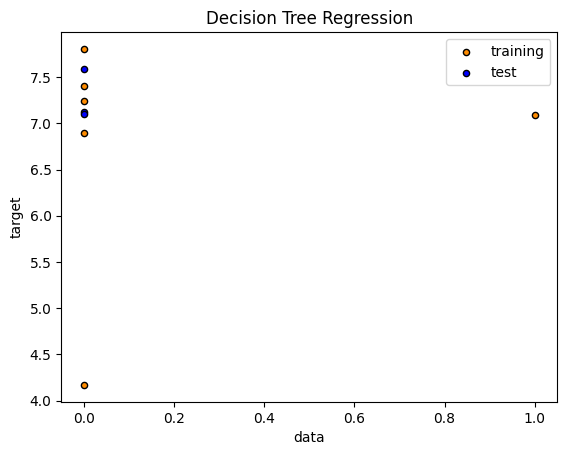

In [53]:
# # Plot the initial data
plt.figure()
plt.scatter(x_train[:,0], y_train, s=20, edgecolor="black", c="darkorange", label="training")
plt.scatter(x_test[:,0], y_test, s=20, edgecolor="black", c="b", label="test")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

#dont need to plot, do t-SNE for vars parity plot with y_pred

In [115]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=4)
regr_3 = DecisionTreeRegressor(max_depth=50)

regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)
regr_3.fit(x_train, y_train)


y_1 = regr_1.predict(sorted(x_test))
y_2 = regr_2.predict(sorted(x_test))
y_3 = regr_3.predict(sorted(x_test))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()